<a href="https://colab.research.google.com/github/2203a5200/daup_2002/blob/main/2203A52002_DATA_FOR_TEXT_ANALYSIS_DAUP_TEXT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-423a8dc52e06>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)


✅ Accuracy: 85.71%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1473
           1       0.89      0.86      0.87      2026

    accuracy                           0.86      3499
   macro avg       0.85      0.86      0.85      3499
weighted avg       0.86      0.86      0.86      3499



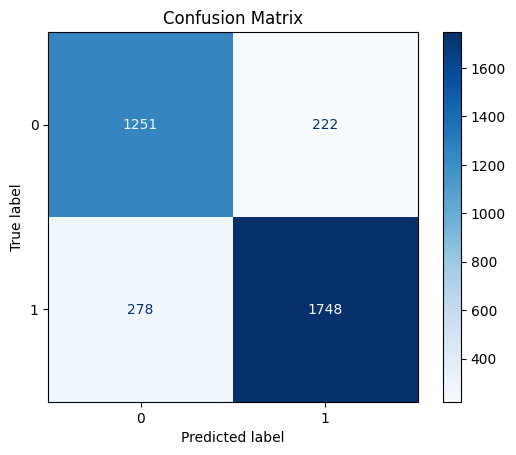

In [ ]:
import zipfile
import os
import pandas as pd

# Step 1: Unzip the file
zip_path = "/content/DAUP_TEXT.zip"  # Make sure your ZIP file is in this path
extract_path = "/content/DAUP_TEXT"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Load the correct CSV file (train.csv)
df = pd.read_csv(os.path.join(extract_path, "train.csv"))

# Step 3: Fill missing values
df['year'].fillna(df['year'].median(), inplace=True)
df.dropna(subset=['user_review'], inplace=True)

# Step 4: Model setup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Features and target
X = df['user_review']
y = df['user_suggestion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced')),
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%\n")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


<ipython-input-3-a2d2793aa4a9>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)


Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


175/175 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - accuracy: 0.5710 - loss: 0.6838 - val_accuracy: 0.5763 - val_loss: 0.6814
Epoch 2/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 50s 287ms/step - accuracy: 0.6080 - loss: 0.6686 - val_accuracy: 0.5977 - val_loss: 0.6633
Epoch 3/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 81s 281ms/step - accuracy: 0.6270 - loss: 0.6107 - val_accuracy: 0.5952 - val_loss: 0.6805
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
Epoch 1/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.5884 - loss: 0.6677 - val_accuracy: 0.8203 - val_loss: 0.4085
Epoch 2/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.8357 - loss: 0.3825 - val_accuracy: 0.8514 - val_loss: 0.3514
Epoch 3/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 170ms/step - accuracy: 0.9151 - loss: 0.2242 - val_accuracy: 0.8553 - val_loss: 0.3444
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step

📊 T-Test: t=5.76, p=0.0000

📉 Z-Score (first 5): 0   -0.030402
1   -0.579770
2   -0.417456
3   -0.561041
4   -0.436185
Name: review_length, dtype

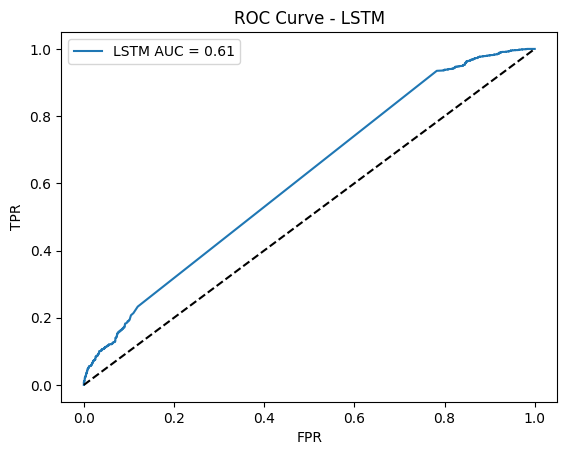


📌 LSTM Precision: 0.61
📌 LSTM Recall: 0.97


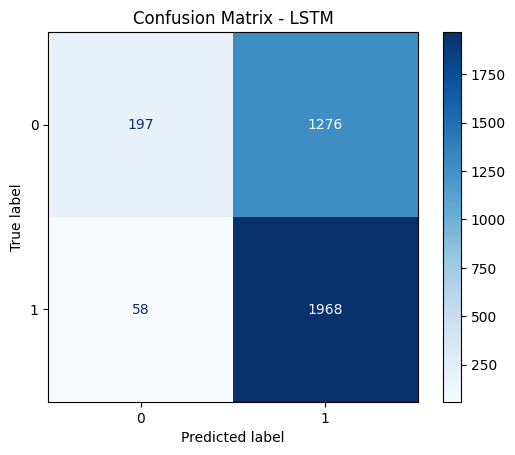

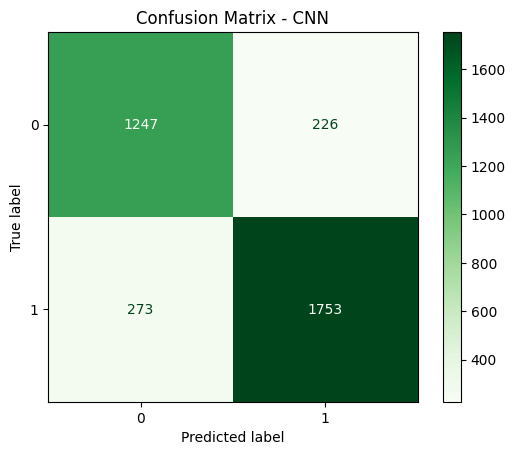

In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, recall_score, roc_curve, roc_auc_score)
from sklearn.preprocessing import label_binarize
from scipy.stats import ttest_ind, zscore, f_oneway

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout,
                                     Conv1D, GlobalMaxPooling1D)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Unzip
zip_path = "/content/DAUP_TEXT.zip"
extract_path = "/content/DAUP_TEXT"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load Data
df = pd.read_csv(os.path.join(extract_path, "train.csv"))
df['year'].fillna(df['year'].median(), inplace=True)
df.dropna(subset=['user_review'], inplace=True)

# Features and target
X = df['user_review']
y = df['user_suggestion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
maxlen = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')
y_train_bin = y_train.astype('int')
y_test_bin = y_test.astype('int')

# LSTM Model
lstm_model = Sequential([
    Embedding(10000, 128, input_length=maxlen),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train_bin, validation_split=0.2, epochs=3, batch_size=64)
y_pred_lstm_prob = lstm_model.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype("int32")

# CNN Model
cnn_model = Sequential([
    Embedding(10000, 128, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train_bin, validation_split=0.2, epochs=3, batch_size=64)
y_pred_cnn_prob = cnn_model.predict(X_test_pad)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype("int32")

# T-Test, Z-Test, ANOVA
df['review_length'] = df['user_review'].apply(lambda x: len(str(x).split()))
group0 = df[df['user_suggestion'] == 0]['review_length']
group1 = df[df['user_suggestion'] == 1]['review_length']
t_stat, t_p = ttest_ind(group0, group1)
z_scores = zscore(df['review_length'])
anova_stat, anova_p = f_oneway(group0, group1)
print(f"\n📊 T-Test: t={t_stat:.2f}, p={t_p:.4f}")
print(f"\n📉 Z-Score (first 5): {z_scores[:5]}")
print(f"\n📈 ANOVA: F={anova_stat:.2f}, p={anova_p:.4f}")

# ROC Curve for LSTM
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_lstm_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_lstm_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"LSTM AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - LSTM")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# Precision, Recall (LSTM)
precision = precision_score(y_test_bin, y_pred_lstm)
recall = recall_score(y_test_bin, y_pred_lstm)
print(f"\n📌 LSTM Precision: {precision:.2f}")
print(f"📌 LSTM Recall: {recall:.2f}")

# Confusion Matrices
ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_lstm, cmap='Blues')
plt.title("Confusion Matrix - LSTM")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_cnn, cmap='Greens')
plt.title("Confusion Matrix - CNN")
plt.show()
